# Principal component Analysis Assignment
"""
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
## warnings ignoring
import warnings
warnings.filterwarnings("ignore")

In [3]:
## loading data set
df=pd.read_csv("wine.csv")
df


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
## EDA 
list(df)

['Type',
 'Alcohol',
 'Malic',
 'Ash',
 'Alcalinity',
 'Magnesium',
 'Phenols',
 'Flavanoids',
 'Nonflavanoids',
 'Proanthocyanins',
 'Color',
 'Hue',
 'Dilution',
 'Proline']

In [5]:
df.shape

(178, 14)

In [6]:
# Checking null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
# correlation
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [8]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


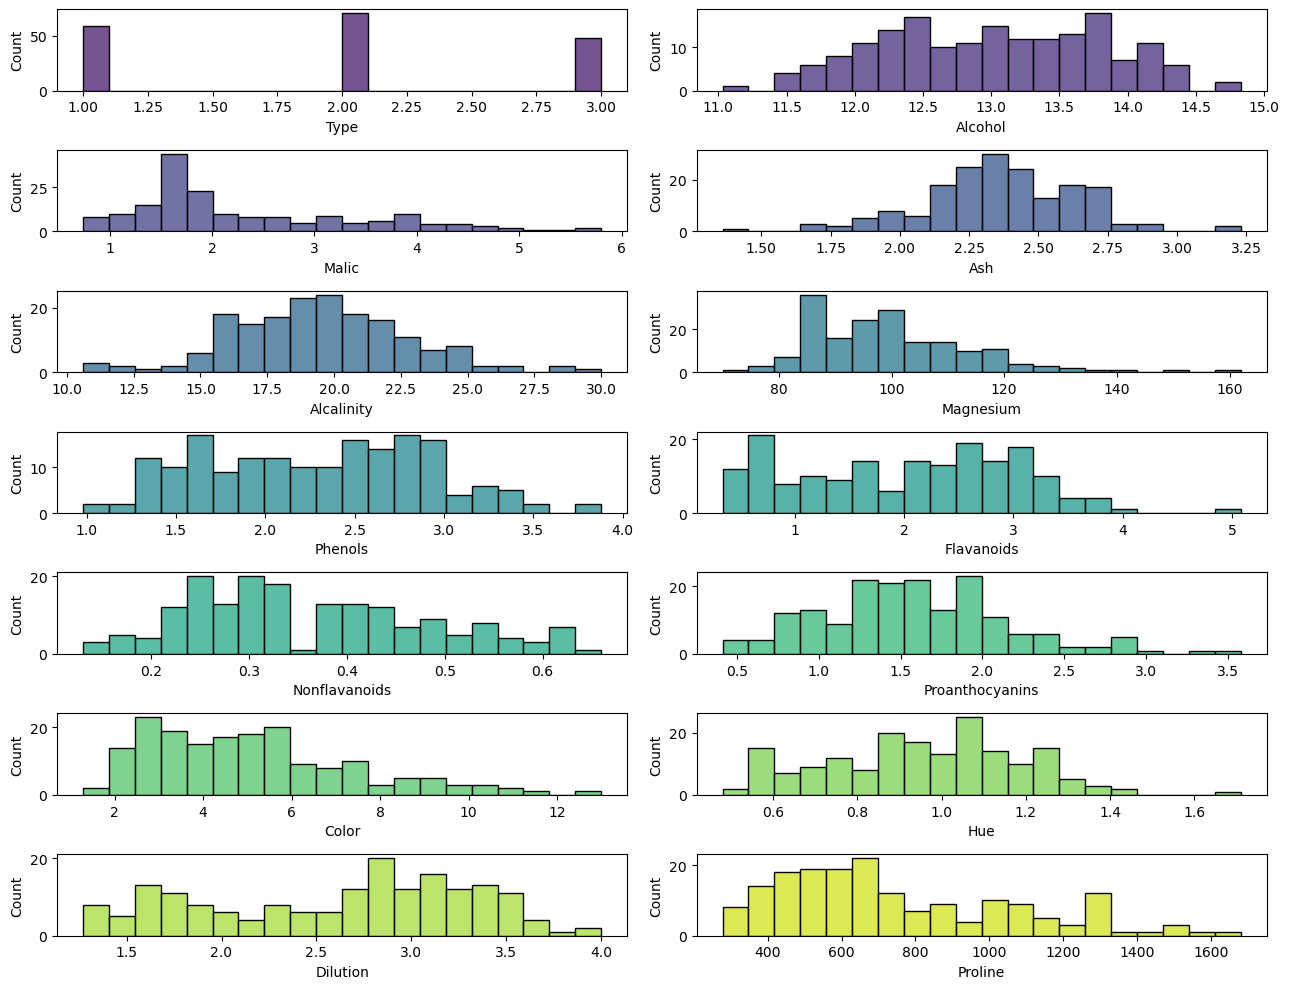

In [9]:
###---Histogram---###
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(13,10))
h1 = ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids',
      'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.histplot(data=df, x=variable, ax=axes[i // 2, i % 2], color=color, bins=20)
plt.tight_layout()
plt.show()

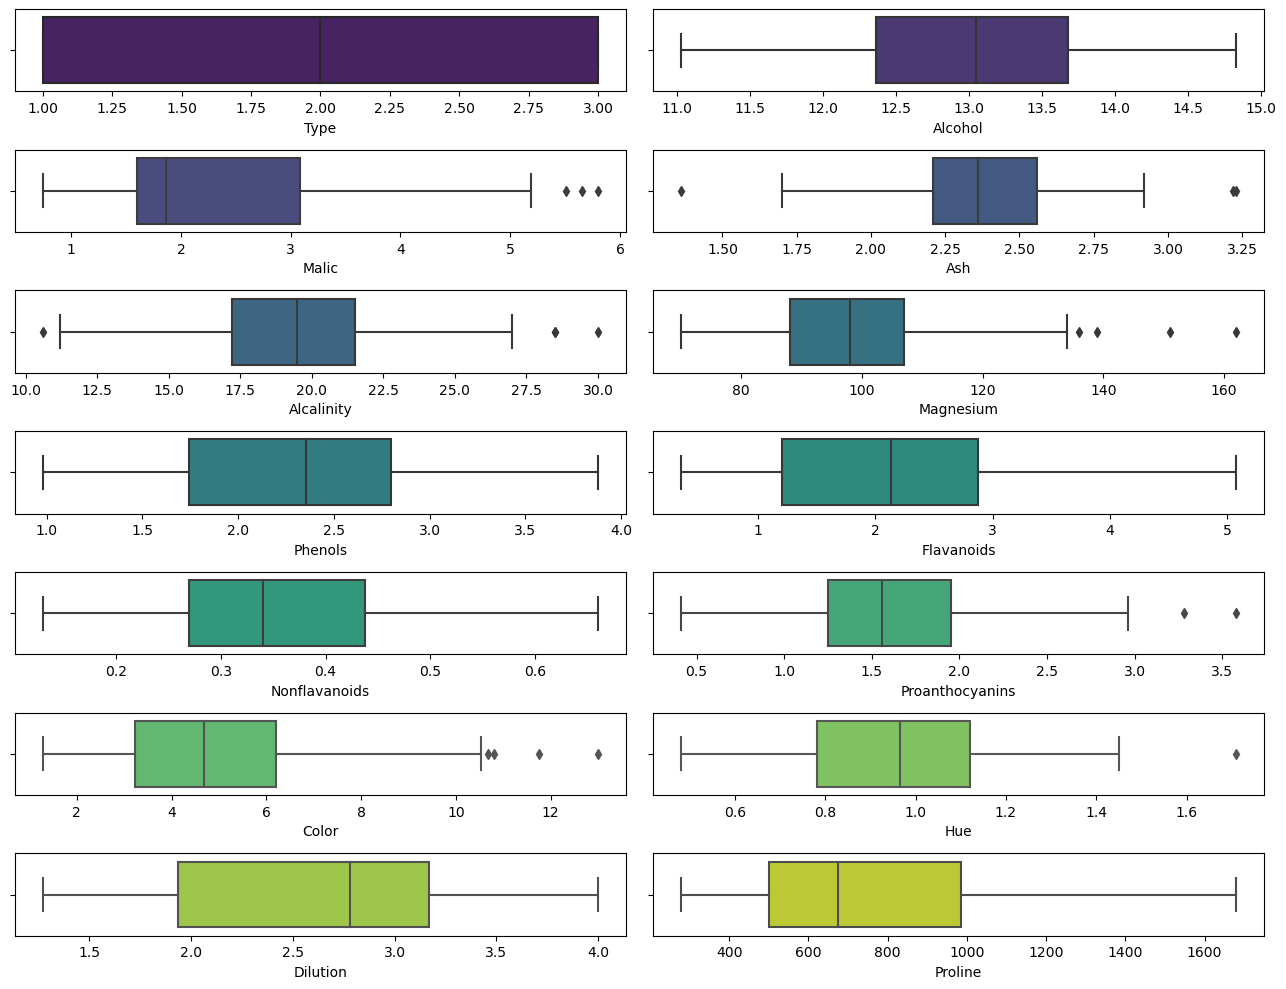

In [10]:
###---BOX-PLOT--###
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(13,10))
h1 = ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids',
      'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.boxplot(data=df, x=variable, ax=axes[i // 2, i % 2],color=color)
plt.tight_layout()
plt.show()

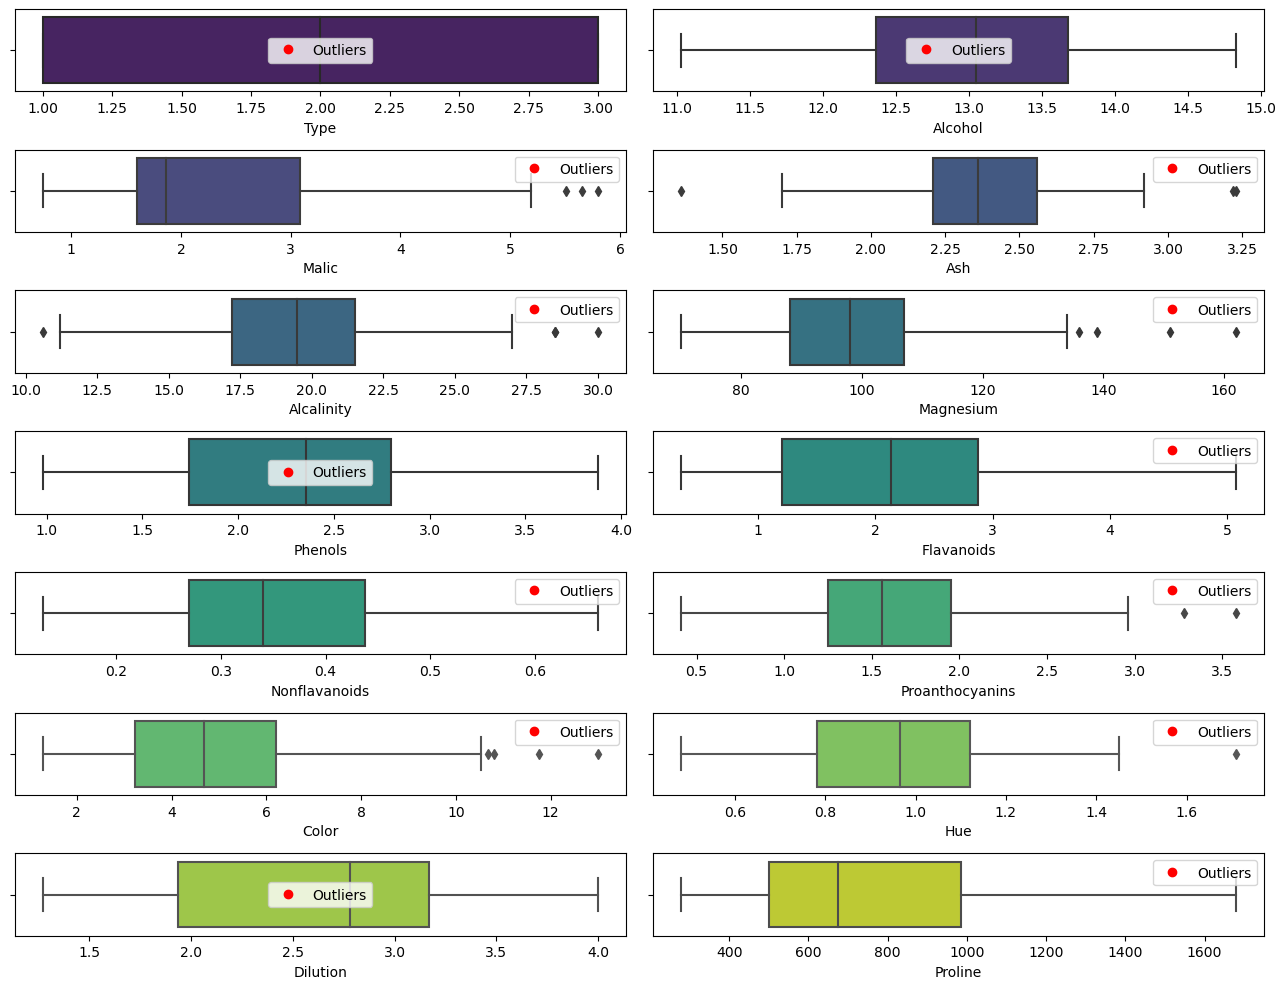

In [11]:
##--- OUTLIERS---###
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(13, 10))
h1 = ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids',
      'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']
colors = sns.color_palette('viridis', n_colors=len(h1))
def calculate_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers
for i, (variable, color) in enumerate(zip(h1, colors)):
    outliers = calculate_outliers(df[variable])
    sns.boxplot(data=df, x=variable, ax=axes[i // 2, i % 2], color=color)
    axes[i // 2, i % 2].plot([], [], marker='o', linestyle='None', color='red', label='Outliers')
    axes[i // 2, i % 2].legend()
plt.tight_layout()
plt.show()

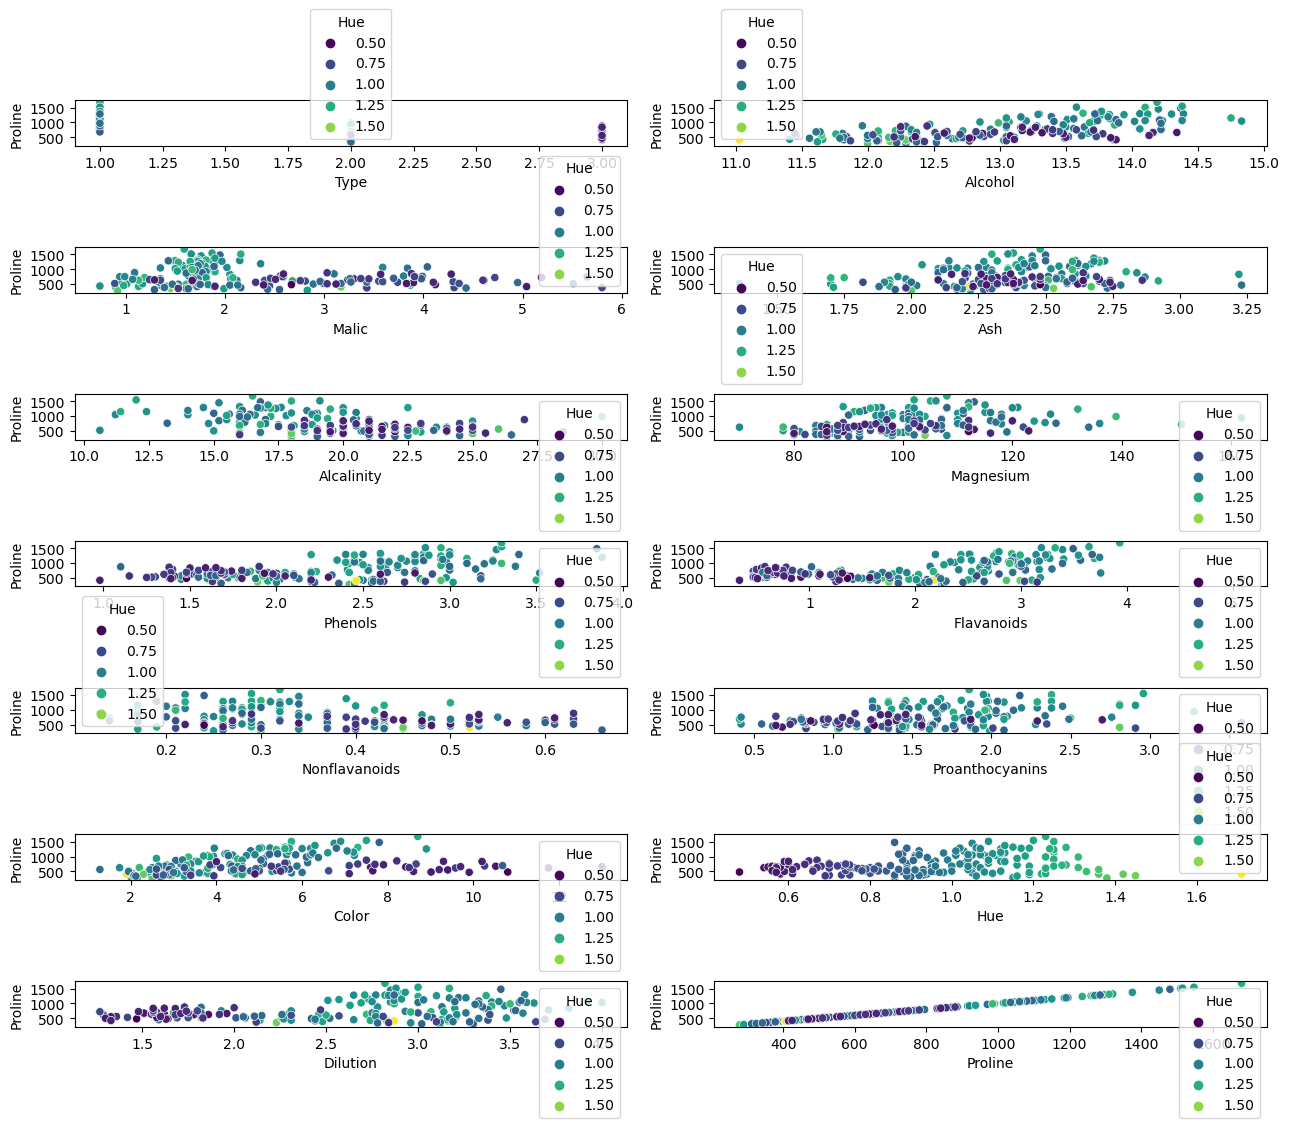

In [12]:
###----SCATTER-PLOT---##
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(13,10))
h1 = ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids',
      'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.scatterplot(data=df, x=variable, y='Proline', hue='Hue', ax=axes[i // 2, i % 2], palette='viridis')
plt.tight_layout()
plt.show()

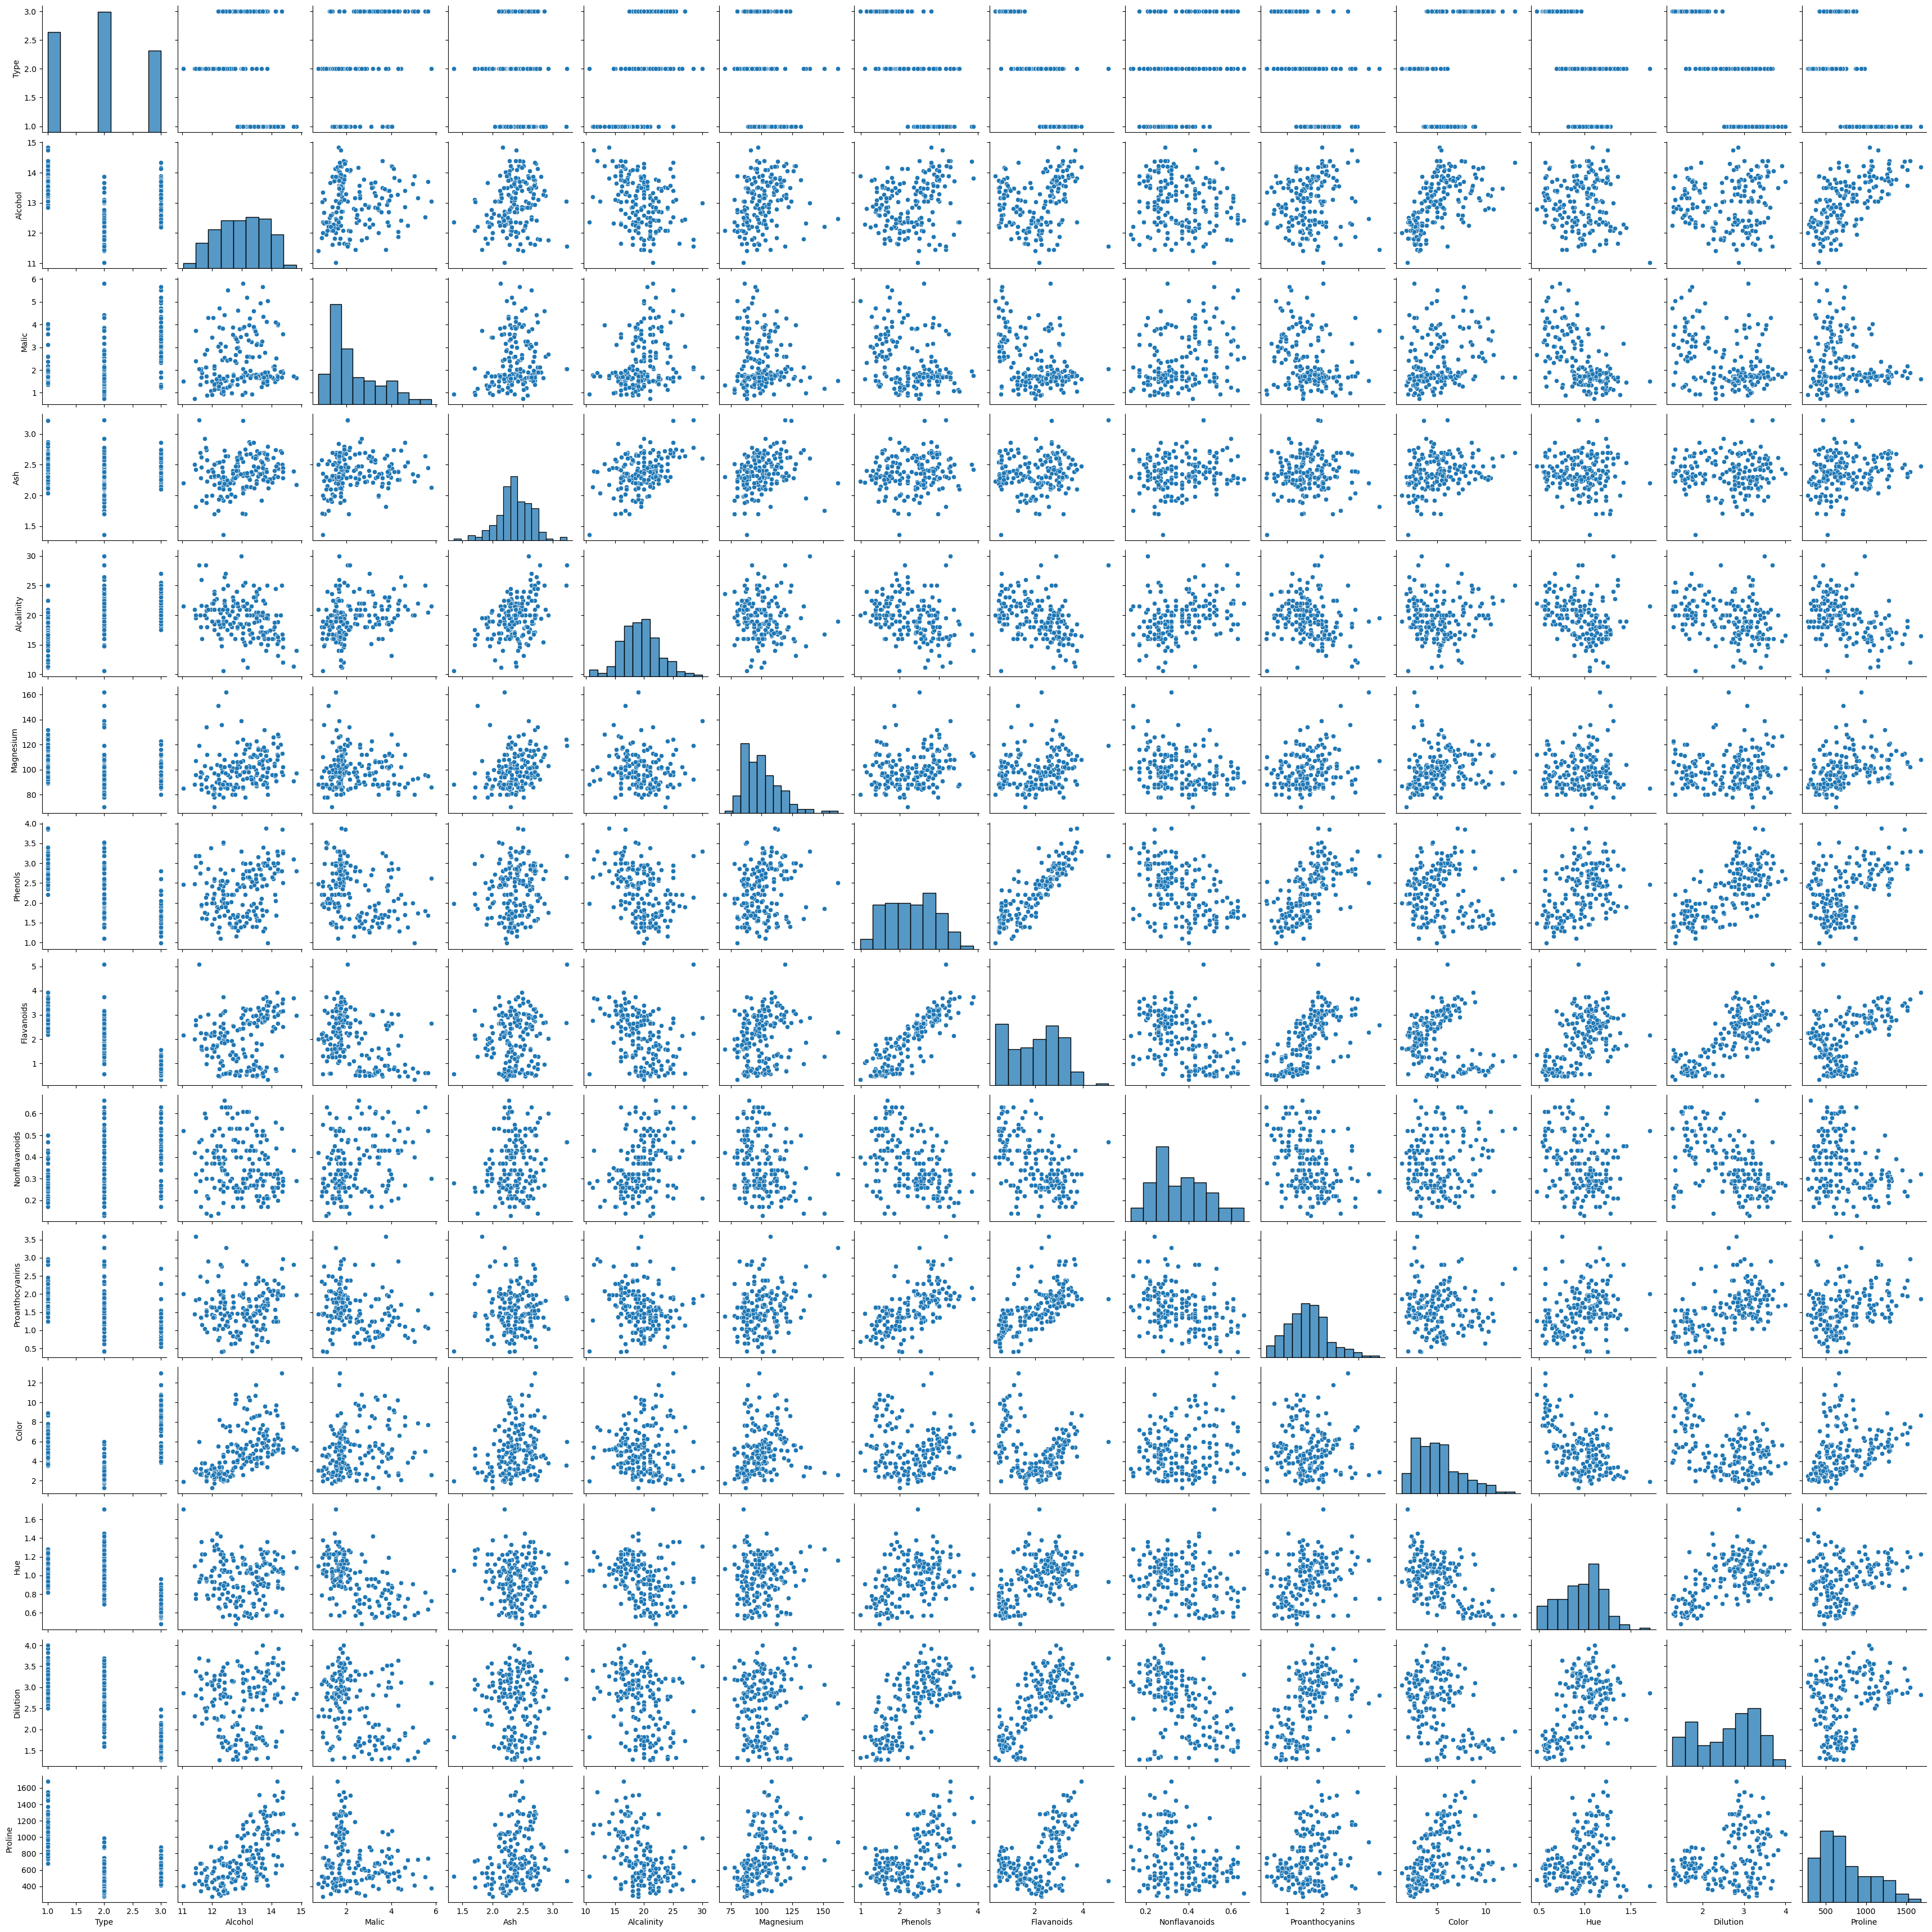

In [13]:
##---pair plot---###
sns.pairplot(df)
plt.show()

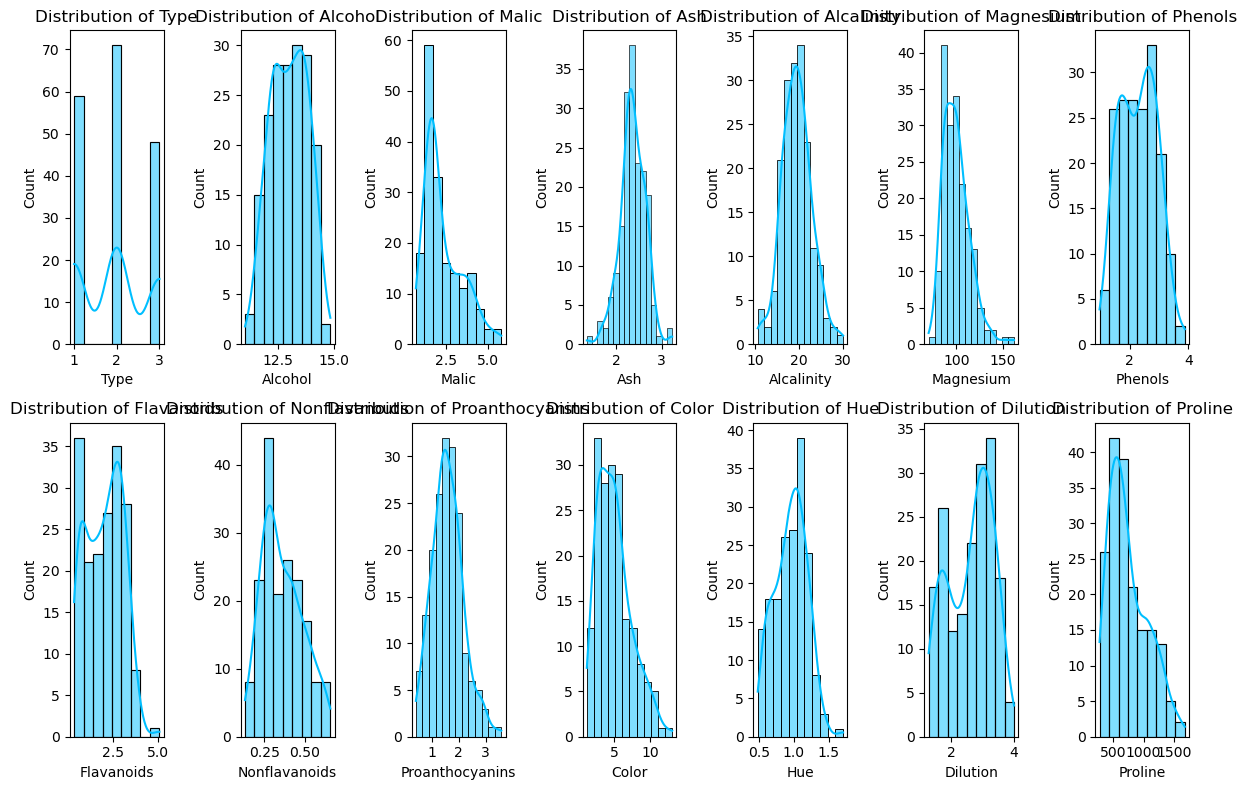

In [14]:
##---DISTRIBUTION PLOT--###
dsplot = ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids',
      'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(12, 8))
axes = axes.flatten()
for i, column in enumerate(dsplot):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i], color='deepskyblue')
    axes[i].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

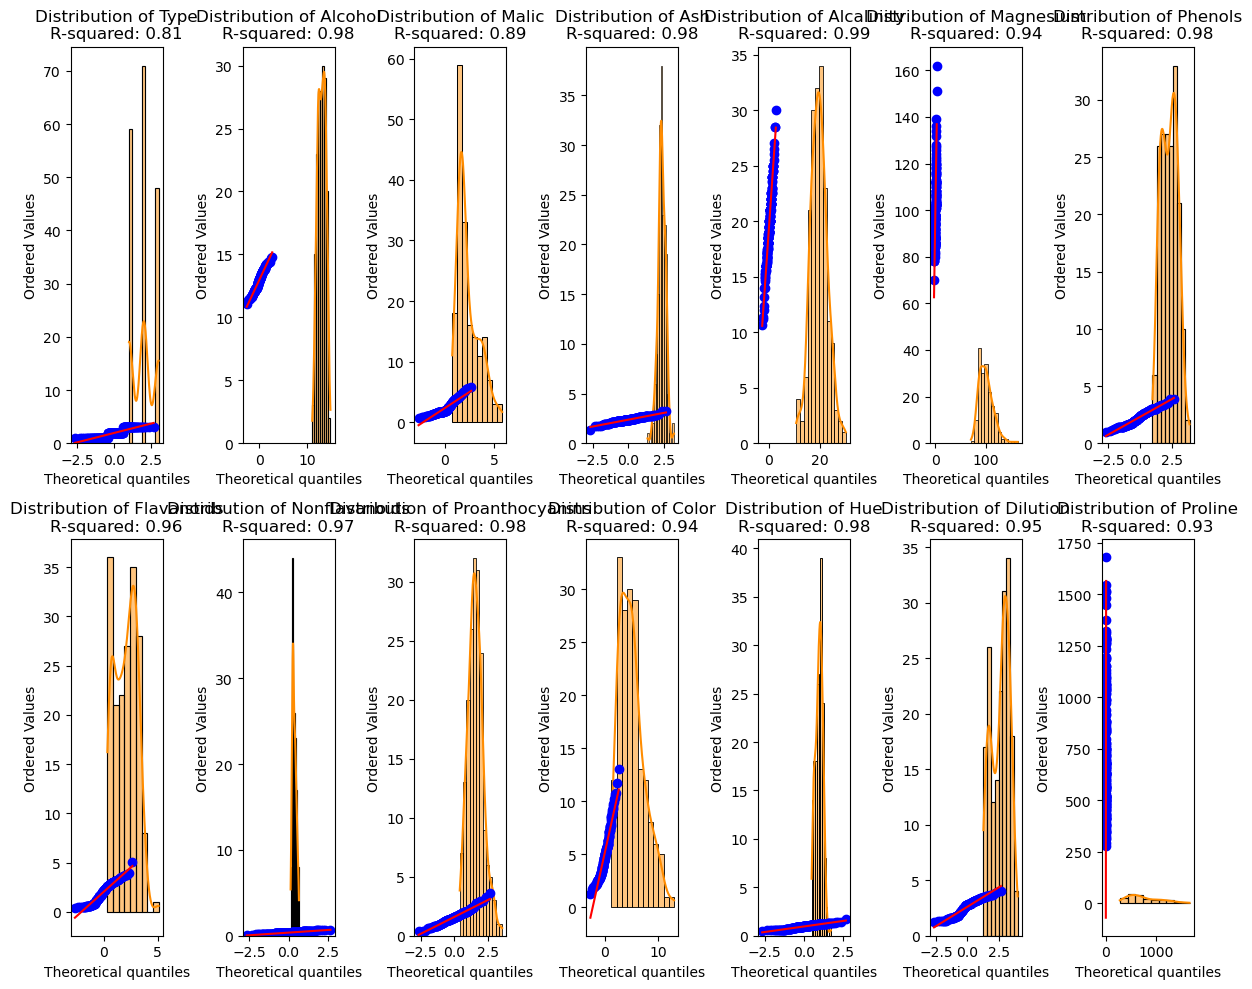

In [15]:
###---Q-Q-plot---##
qqplot = ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids',
          'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(12,10))
axes = axes.flatten()
for i, column in enumerate(qqplot):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i], color='darkorange')
    axes[i].set_title(f'Distribution of {column}')
    _, (slope, intercept, r) = probplot(df[column], plot=axes[i])
    axes[i].set_title(f'Distribution of {column}\nR-squared: {r**2:.2f}')
plt.tight_layout()
plt.show()

In [16]:
## PCA Analysis

In [17]:
## X accessing
X=df.iloc[:,0:]

In [18]:
X

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [19]:
##--LabelEncoding---
LE=LabelEncoder()

In [20]:
###----Standardization---###
SS=StandardScaler()
SS_X=SS.fit_transform(X)
pd.DataFrame(SS_X)
SS_X

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [21]:
###--- converting into data frames
pd.DataFrame(SS_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [22]:
###---Principal component analysis--###
pc = PCA()
pc_df  = pc.fit_transform(SS_X)
pc_df = pd.DataFrame(pc_df)
pc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823


In [23]:
##--variance of each---##
pc_df.iloc[0].var()
pc_df.iloc[1].var()
pc_df.iloc[2].var()

0.9558967845547823

In [24]:
pd.DataFrame((pc.explained_variance_ratio_)*100)

,0
0,39.542486
1,17.836259
2,10.329102
3,6.627984
4,6.267875
5,4.805560
6,3.955707
7,2.500244
8,2.103871
9,1.873615


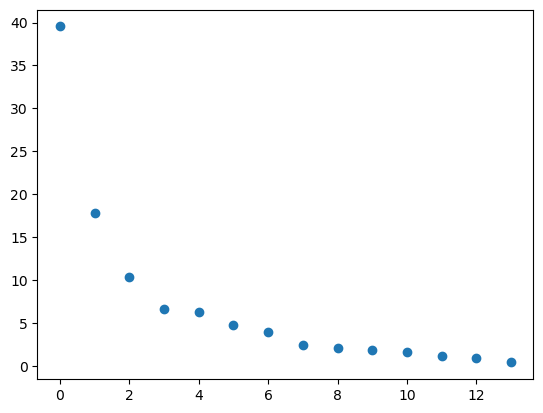

In [25]:
###-- plot for-pc.explained_variance_ratio--- 
plt.scatter(range(0,14),pd.DataFrame((pc.explained_variance_ratio_)*100))
plt.show()

In [26]:
###---Using first 3 PCA---### 
X_new = pc_df.iloc[:,0:3]
X_new

,0,1,2
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [27]:
### -- K - MEANS ---####
KMeans=KMeans(n_clusters=5,n_init=30)
KMeans.fit(X_new)


KMeans(n_clusters=5, n_init=30)

In [28]:
Y=KMeans.predict(X_new)
Y=pd.DataFrame(Y)
Y[0].value_counts()

2    49
0    43
1    35
3    30
4    21
Name: 0, dtype: int64

In [29]:
###--- inertia value ----###
KMeans.inertia_

355.7392759912641

In [31]:
inertia=[]
from sklearn.cluster import KMeans

for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(X_new)
    inertia.append(km.inertia_)


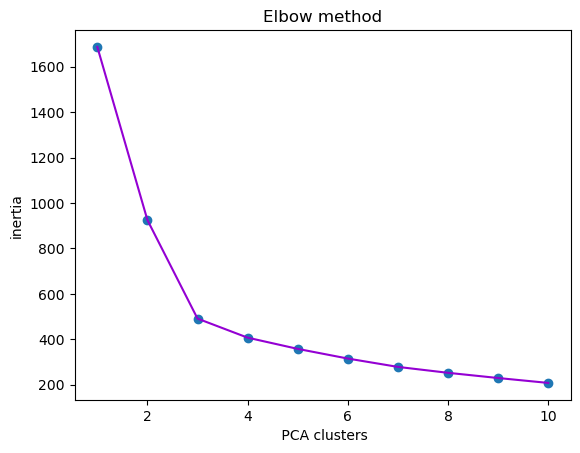

In [32]:
#---Elbow method-curve--    
plt.scatter(range(1,11),inertia)
plt.plot(range(1,11),inertia,color='darkviolet')
plt.title('Elbow method')
plt.xlabel(' PCA clusters')
plt.ylabel('inertia')
plt.show()

In [33]:
## -- Agglomerative clustering --- ###
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Y=cluster.fit_predict(X_new)
Y=pd.DataFrame(Y)
Y.value_counts()

2    56
1    48
0    41
3    29
4     4
dtype: int64

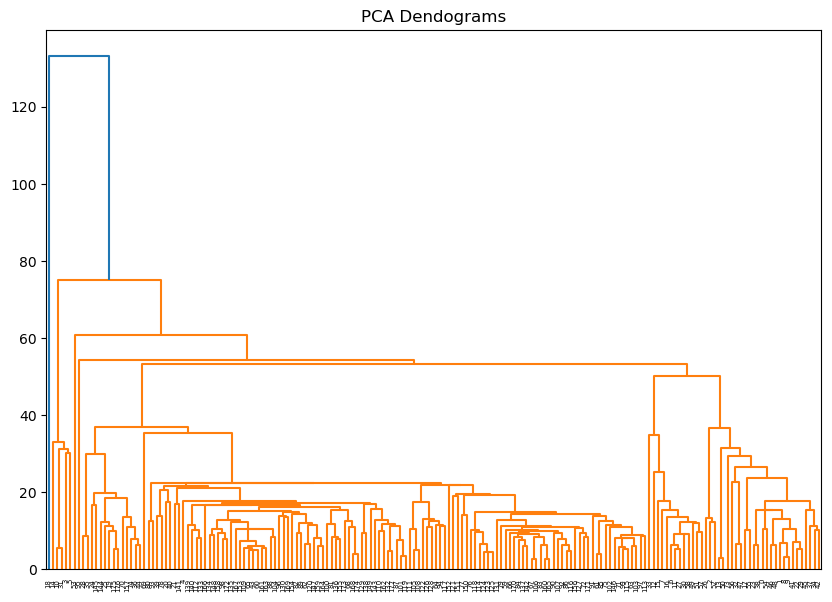

In [34]:
## -- Dendogram---###
plt.figure(figsize=(10,7))
plt.title("PCA Dendograms")
dend=shc.dendrogram(shc.linkage(X,method='single')) 